In [68]:
image = cv2.imread('img_2.png')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(rgb_image, lang='kor'))

4호선누나
2 비



In [1]:
from PIL import Image
import pytesseract

In [170]:
from matplotlib import pyplot as plt
import cv2
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import imutils
from easyocr import Reader
import requests
import numpy as np
from PIL import ImageFont, ImageDraw, Image

In [62]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()
 
 
def make_scan_image(image, width, ksize=(5,5), min_threshold=75, max_threshold=200):
    image_list_title = []
    image_list = []

    image = imutils.resize(image, width=width)
    ratio = org_image.shape[1] / float(image.shape[1])

    # 이미지를 grayscale로 변환하고 blur를 적용
    # 모서리를 찾기위한 이미지 연산
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, ksize, 0)
    edged = cv2.Canny(blurred, min_threshold, max_threshold)

    image_list_title = ['gray', 'blurred', 'edged']
    image_list = [gray, blurred, edged]

    # contours를 찾아 크기순으로 정렬
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    findCnt = None

    # 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # contours가 크기순으로 정렬되어 있기때문에 제일 첫번째 사각형을 영역으로 판단하고 break
        if len(approx) == 4:
            findCnt = approx
            break


    # 만약 추출한 윤곽이 없을 경우 오류
    if findCnt is None:
        raise Exception(("Could not find outline."))


    output = image.copy()
    cv2.drawContours(output, [findCnt], -1, (0, 255, 0), 2)

    image_list_title.append("Outline")
    image_list.append(output)

    # 원본 이미지에 찾은 윤곽을 기준으로 이미지를 보정
    transform_image = four_point_transform(org_image, findCnt.reshape(4, 2) * ratio)

    plt_imshow(image_list_title, image_list)
    plt_imshow("Transform", transform_image)

    return transform_image

In [99]:
def putText(cv_img, text, x, y, color=(0, 0, 0), font_size=6):
    # Colab이 아닌 Local에서 수행 시에는 gulim.ttc 를 사용하면 됩니다.
    font = ImageFont.truetype("AppleGothic.ttf", font_size)
    #font = ImageFont.truetype('/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', font_size)
    img = Image.fromarray(cv_img)

    draw = ImageDraw.Draw(img)
    draw.text((x, y), text, font=font, fill=color)

    cv_img = np.array(img)

    return cv_img

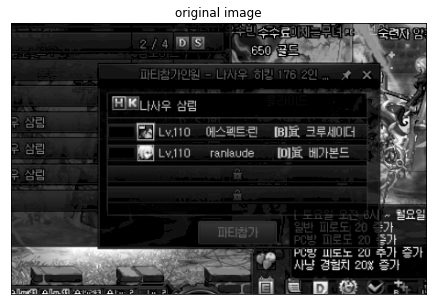

In [177]:
plt_imshow("original image", org_image)

In [192]:
image = cv2.imread('img_1.png')

In [193]:
org_image = cv2.imread('img_1.png', cv2.IMREAD_GRAYSCALE)

In [194]:
langs = ['ko', 'en']
print("[INFO] OCR'ing input image")
reader = Reader(lang_list=langs, gpu=False)
results = reader.readtext(org_image)

Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image


In [195]:
results

[([[43, 1], [115, 1], [115, 21], [43, 21]], '파티합기민원', 0.2767869199954288),
 ([[125, 1], [261, 1], [261, 21], [125, 21]],
  '"캐니터 히속 환정 달리 "',
  0.02935608643500015),
 ([[33, 35], [101, 35], [101, 55], [33, 55]], '나사무 삼림', 0.5691778846855263),
 ([[65, 67], [105, 67], [105, 83], [65, 83]], 'Lviin', 0.2209980218597919),
 ([[119, 67], [175, 67], [175, 83], [119, 83]], '이호선누나', 0.32070264489810224),
 ([[191, 67], [283, 67], [283, 83], [191, 83]],
  '[Bl름 크루세미터',
  0.2639611237567076),
 ([[65, 91], [105, 91], [105, 105], [65, 105]], 'Llin', 0.7721071243286133),
 ([[127, 87], [167, 87], [167, 107], [127, 107]], "'관개이", 0.1662382334470749),
 ([[191, 89], [283, 89], [283, 105], [191, 105]],
  '[미러레멘죽마스E',
  0.01346902162058822),
 ([[129, 177], [179, 177], [179, 193], [129, 193]],
  '파티침가',
  0.35315021872520447)]

In [198]:
image_complete = image
# loop over the results
for (bbox, text, prob) in results:
    print("[INFO] {:.4f}: {}".format(prob, text))

    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # 추출한 영역에 사각형을 그리고 인식한 글자를 표기합니다.
    cv2.rectangle(image, tl, br, (0, 255, 0), 2)
    image_complete = putText(image_complete, text, tl[0], tl[1] + 20, (0, 255, 0), 10)
#     cv2.putText(business_card_image, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    

[INFO] 0.2768: 파티합기민원
[INFO] 0.0294: "캐니터 히속 환정 달리 "
[INFO] 0.5692: 나사무 삼림
[INFO] 0.2210: Lviin
[INFO] 0.3207: 이호선누나
[INFO] 0.2640: [Bl름 크루세미터
[INFO] 0.7721: Llin
[INFO] 0.1662: '관개이
[INFO] 0.0135: [미러레멘죽마스E
[INFO] 0.3532: 파티침가


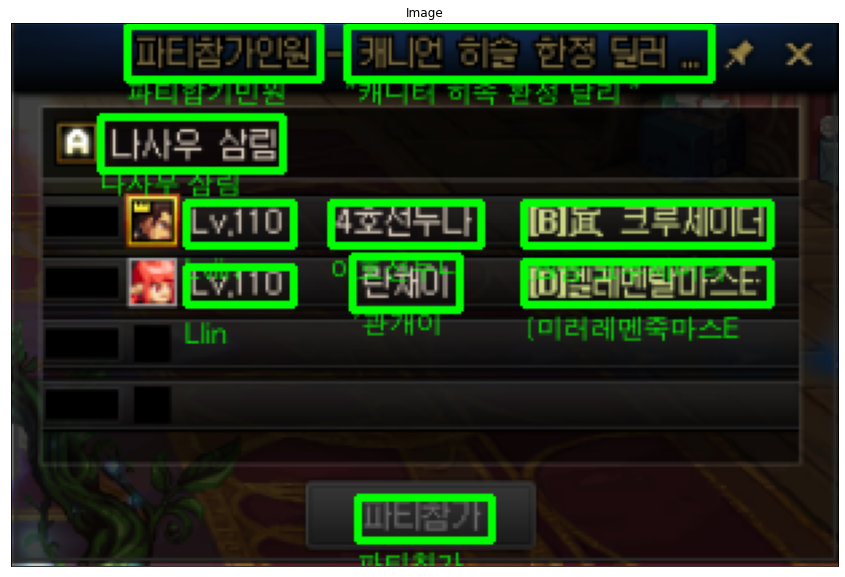

In [199]:
plt_imshow("Image", image_complete, figsize=(16,10))